In [2]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from imgaug.augmentables.kps import KeypointsOnImage
from imgaug.augmentables.kps import Keypoint
import imgaug.augmenters as iaa

from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json
import os

from pycocotools.coco import COCO
import requests
import skimage.io as io
from pathlib import Path

2022-08-19 13:56:20.384124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-19 13:56:20.384224: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 5
NUM_KEYPOINTS = 17 * 2  # 24 pairs each having x and y coordinates

In [4]:
annFile_train = Path('/home/nathalif/fiftyone/coco-2017/raw/person_keypoints_train2017.json')
annFile_val = Path('/home/nathalif/fiftyone/coco-2017/raw/person_keypoints_val2017.json')

In [5]:
# Person keypoints annotations
train2017_coco = COCO(annFile_train)
val2017_coco = COCO(annFile_val)

loading annotations into memory...
Done (t=6.84s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [6]:
# Get all images containing given categories
# Specify a list of category names of interest
catIds_train = train2017_coco.getCatIds(catNms=['person'])[0]
catIds_val = val2017_coco.getCatIds(catNms=['person'])[0]

# Get the corresponding image ids and images using loadImgs
imgIds_train = train2017_coco.getImgIds(catIds=[catIds_train])
imgIds_val = val2017_coco.getImgIds(catIds=[catIds_val])

In [7]:
len(imgIds_val)

2693

In [8]:
# List with images info: 'license','file_name','coco_url','height','width','id', etc.
img_info_train = train2017_coco.loadImgs(imgIds_train)
img_info_val = val2017_coco.loadImgs(imgIds_val)

In [9]:
img_info_val[0]['coco_url']

'http://images.cocodataset.org/val2017/000000532481.jpg'

# Visualize images

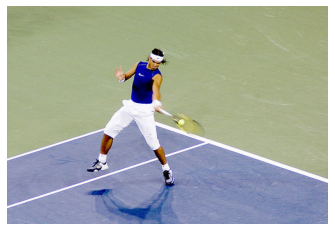

In [10]:
# Testing images
# select one image at random
img_train = train2017_coco.loadImgs(imgIds_train[np.random.randint(0,len(imgIds_train))])[0]

img_val = val2017_coco.loadImgs(imgIds_val[np.random.randint(0,len(imgIds_val))])[0]

I = io.imread(img_train['coco_url'])
a = I / 255.0
plt.axis('off')
plt.imshow(I)
plt.show()

<class 'list'>


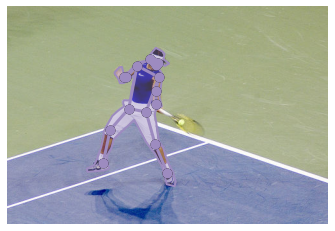

In [11]:
# load and display keypoints annotations
plt.imshow(a)
plt.axis('off')
ax = plt.gca()

annIds_train = train2017_coco.getAnnIds(imgIds=img_train['id'], catIds=catIds_train, iscrowd=None)

anns_train = train2017_coco.loadAnns(annIds_train)
print(type(anns_train))

train2017_coco.showAnns(anns_train)

## -------------------------GET_DOG()-----------------------------------------------------------

In [11]:
'''# data dictionary
# 'license','file_name','coco_url','height','width','id', etc.
data = {'train':img_info_train, 'validation':img_info_val}

# data = dict with 'img_bbox', img_data'(image data to plot), 'joints'(keypoints)
for i in range(0, len(data['validation'])):

    img_load = val2017_coco.loadImgs(data['validation'][i]['id'])[0]

    I = io.imread(img_load['coco_url'])
    data['validation'][i]['img_data'] = I   # type -> numpy.ndarray
    
    annIds_val = val2017_coco.getAnnIds(imgIds=data['validation'][i]['id'])
    anns_val = val2017_coco.loadAnns(annIds_val)[0]
    
    joints_array = [] # equivalent to current_keypoint (x, y, visible or not)
    for i in range(0,len(bbb['validation'][num]['joints'])):
        if i % 3 == 0:
            joints_array.append(bbb['validation'][num]['joints'][i:i+3])

    
    data['validation'][i]['joints'] = joints_array #type -> list
    
'''

"# data dictionary\n# 'license','file_name','coco_url','height','width','id', etc.\ndata = {'train':img_info_train, 'validation':img_info_val}\n\n# data = dict with 'img_bbox', img_data'(image data to plot), 'joints'(keypoints)\nfor i in range(0, len(data['validation'])):\n\n    img_load = val2017_coco.loadImgs(data['validation'][i]['id'])[0]\n\n    I = io.imread(img_load['coco_url'])\n    data['validation'][i]['img_data'] = I   # type -> numpy.ndarray\n    \n    annIds_val = val2017_coco.getAnnIds(imgIds=data['validation'][i]['id'])\n    anns_val = val2017_coco.loadAnns(annIds_val)[0]\n    \n    joints_array = [] # equivalent to current_keypoint (x, y, visible or not)\n    for i in range(0,len(bbb['validation'][num]['joints'])):\n        if i % 3 == 0:\n            joints_array.append(bbb['validation'][num]['joints'][i:i+3])\n\n    \n    data['validation'][i]['joints'] = joints_array #type -> list\n    \n"

In [10]:
def get_person(img)

SyntaxError: invalid syntax (737307768.py, line 1)

In [43]:
train_aug = iaa.Sequential(
    [
        iaa.Resize(IMG_SIZE, interpolation="linear"),
        iaa.Fliplr(0.3),
        # `Sometimes()` applies a function randomly to the inputs with
        # a given probability (0.3, in this case).
        iaa.Sometimes(0.3, iaa.Affine(rotate=10, scale=(0.5, 0.7))),
    ]
)

test_aug = iaa.Sequential([iaa.Resize(IMG_SIZE, interpolation="linear")])

In [62]:
def get_person(num_img):
    # data dictionary
    # 'license','file_name','coco_url','height','width','id', etc.
    data = {}
    data = img_info_val[num_img]

    # data = dict with 'img_bbox', img_data'(image data to plot), 'joints'(keypoints)

    img_load = val2017_coco.loadImgs(data['id'])[0]

    img = io.imread(img_load['coco_url'])
    data['img_data'] = img   # type -> numpy.ndarray

    annIds_val = val2017_coco.getAnnIds(imgIds=data['id'])
    anns_val = val2017_coco.loadAnns(annIds_val)[0]
    
    batch_images = np.empty((64, IMG_SIZE, IMG_SIZE, 3), dtype="int")

    joints_array = [] # equivalent to current_keypoint (x, y, visible or not)
    
    for i in range(0,len(anns_val['keypoints'])):
        if i % 3 == 0:
            joints_array.append(anns_val['keypoints'][i:i+3])
     
    

    data['joints'] = np.array(joints_array) #type -> array
    #print(data['joints'])
    
    current_keypoint = np.array(joints_array)[:, :2]
    print(current_keypoint.shape)
    
    kps = []

    # To apply our data augmentation pipeline, we first need to
    # form Keypoint objects with the original coordinates.
    for j in range(0, len(current_keypoint)):
        kps.append(Keypoint(x=current_keypoint[j][0], y=current_keypoint[j][1]))

    # We then project the original image and its keypoint coordinates.
    current_image = img
    kps_obj = KeypointsOnImage(kps, shape=current_image.shape)

    # Apply the augmentation pipeline.
    (new_image, new_kps_obj) = train_aug(image=current_image, keypoints=kps_obj)
    
    batch_images[i,] = new_image

            
            
    return new_image

In [63]:

get_person(0)

(17, 2)
(224, 224, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [285]:
len(anns_val['keypoints'])

51

In [152]:
num_img = 1
data = {'validation':img_info_val[num_img]}
img_load = val2017_coco.loadImgs(data['validation']['id'])[0]
annIds_val = val2017_coco.getAnnIds(imgIds=data['validation']['id'])
anns_val = val2017_coco.loadAnns(annIds_val)

In [219]:
anns_val

{'segmentation': [[253.85,
   187.23,
   250.82,
   193.01,
   255.22,
   199.6,
   260.99,
   202.35,
   270.89,
   204.55,
   273.64,
   211.15,
   277.21,
   222.15,
   284.09,
   228.47,
   293.71,
   232.04,
   303.06,
   233.14,
   311.03,
   231.77,
   317.9,
   224.9,
   320.93,
   215.55,
   320.1,
   206.48,
   315.43,
   199.05,
   310.2,
   193.56,
   308.83,
   186.13,
   299.48,
   182.28,
   294.81,
   182.01,
   288.49,
   175.96,
   284.09,
   169.36,
   273.64,
   168.26,
   273.09,
   172.94,
   277.49,
   177.34,
   283.81,
   181.46,
   287.94,
   184.48,
   283.26,
   188.06,
   281.61,
   190.53,
   283.54,
   196.58,
   284.36,
   202.9,
   279.96,
   198.5,
   272.54,
   194.93,
   266.77,
   195.21,
   265.12,
   194.38,
   259.89,
   189.43,
   254.12,
   186.96]],
 'num_keypoints': 12,
 'area': 2188.0865,
 'iscrowd': 0,
 'keypoints': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  303,
  221,
  2,
  314,
  209,
  2,
  285,
  213,


In [57]:
'''num =500
bbb = {'train':img_info_train, 'validation':img_info_val}

load = val2017_coco.loadImgs(bbb['validation'][num]['id'])[0]

I = io.imread(load['coco_url'])
bbb['validation'][num]['img_data'] = I'''

In [111]:

annIds_val = val2017_coco.getAnnIds(imgIds=bbb['validation'][num]['id'])
anns_val = val2017_coco.loadAnns(annIds_val)[0]

bbb['validation'][num]['joints'] = anns_val['keypoints']


In [65]:
type(bbb['validation'][num]['img_data'])

numpy.ndarray

51

In [87]:
a = []
a.append(bbb['validation'][num]['joints'][0:0+3])
a.append(bbb['validation'][num]['joints'][3:3+3])
a.append(bbb['validation'][num]['joints'][6:6+3])
print(a)

[[211, 287, 2], [218, 283, 2], [208, 280, 2]]


In [73]:
c = np.array(bbb['validation'][num]['joints'])

In [74]:
print(c)

[211 287   2 218 283   2 208 280   2   0   0   0 200 277   2 216 309   2
 178 293   2 228 335   2 152 298   2 238 353   2 154 310   2 175 356   2
 152 349   2 205 352   2   0   0   0 173 396   2   0   0   0]


In [101]:
a = []
for i in range(0,len(bbb['validation'][num]['joints'])):

    if i % 3 == 0:
        
        a.append(bbb['validation'][num]['joints'][i:i+3])
    


In [106]:
aa = np.asarray(a)

## ---------------------------------------------------------------------------------

In [11]:
train_dataset = KeyPointsDataset(train_keys, train_aug)

NameError: name 'train_keys' is not defined

In [83]:
class KeyPointsDataset(keras.utils.Sequence):
    def __init__(self,
                imgIds,
                instance_annotations, #train2017_coco, val2017_coco
                aug,
                to_fit=True,
                batch_size=BATCH_SIZE,
                train=True):
        
        self.to_fit = to_fit
        self.imgIds = imgIds
        self.instance_annotations = instance_annotations
        # Image IDs - all images (118287 in train and 5000 in validation datasets)
        self.imgIds = imgIds
        
        # In this case there's only one category (1 = person)
        self.catIds = self.instance_annotations.getCatIds() # type = list
        
        self.aug = aug
        self.batch_size = batch_size
        self.train = train
        self.on_epoch_end()
        
    # Calculating total batches in training or validation set
    def __len__(self):
        return int(np.ceil(float(len(self.imgIds)) / self.batch_size))
    
    # After an epoch ends, shuffle the indexes
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.imgIds))
        if self.train:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        
        # Generate indexes of the batch
        # indexes is equivalent to imgIds after shuffle
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
        
        # Find list of temporary IDs
        imgIds_temp = [self.imgIds[k] for k in indexes]
        
        (images, keypoints) = self.__data_generation(imgIds_temp)
        
        #print('indexes type:', type(indexes))
        #print('indexes type:', indexes.shape)

        return (images, keypoints)
    
    def __data_generation(self, imgIds_temp):
        
        # Inicialization
        batch_images = np.empty((self.batch_size, IMG_SIZE, IMG_SIZE, 3), dtype="int")
        '''        
        print('batch_images:', type(batch_images))
        print('batch_images:', batch_images.shape)
        '''
        batch_keypoints = np.empty((self.batch_size, 1, 1, NUM_KEYPOINTS), dtype="float32")
        '''        print('batch_keypoints:', type(batch_keypoints))
        print('batch_keypoints:', batch_keypoints.shape)
        '''
        for i, idx in enumerate(imgIds_temp):
            
            # Dict with images info: 'license','file_name','coco_url','height','width','id', etc.
            img_anns = self.instance_annotations.loadImgs(idx)[0]
            img_path = img_anns['coco_url']
            
            #print('img_anns:', type(img_anns))
            #print('img_anns:', img_anns)
            
            
            # Load image
            img = io.imread(img_path) #equivalent to data['img_data']
            #print('img:', type(img)) -img: <class 'numpy.ndarray'>
            #print('img:', img.shape)  - img: (480, 640, 3) (varia)

            
            # Load Keypoints Mask

            annIds = self.instance_annotations.getAnnIds(imgIds=img_anns['id'], catIds=self.catIds, iscrowd=None)
            anns = self.instance_annotations.loadAnns(annIds)[0] #list
            
            #print('annIds:', type(img_anns))
            #print('anns :', anns)
            
                
            
            joints_array = [] # equivalent to current_keypoint (x, y, visible or not)

            for aux in range(0,len(anns['keypoints'])):
                if aux % 3 == 0:
                    joints_array.append(anns['keypoints'][aux:aux+3])

            current_keypoint = np.array(joints_array)[:, :2] #type -> array
            #print(type(current_keypoint)) <class 'numpy.ndarray'>
            #print(current_keypoint.shape) - (17, 2)
            #print(len(current_keypoint)) - 17
            kps = []

            # To apply our data augmentation pipeline, we first need to
            # form Keypoint objects with the original coordinates.
            for j in range(0, len(current_keypoint)):
                kps.append(Keypoint(x=current_keypoint[j][0], y=current_keypoint[j][1]))

            #print(type(kps))
            #print(len(kps))
            #print(kps)
    
                
            # We then project the original image and its keypoint coordinates.
            current_image = img
            
            #print(type(current_image))
            #print(len(current_image))
            #print(current_image.shape)
            
            
            kps_obj = KeypointsOnImage(kps, shape=current_image.shape)
            #print(type(kps_obj))
            #print(kps_obj)
            #print(len(kps_obj))
            
            # Apply the augmentation pipeline.
            (new_image, new_kps_obj) = self.aug(image=current_image, keypoints=kps_obj)
            
            '''
            print('New image')
            print(type(new_image))
            print(new_image.shape)
            print(len(new_image))
            print('-------------------')
            print('New kps')
            print(type(new_kps_obj))
            print(new_kps_obj.shape)
            print(len(new_kps_obj))
            print('-------------------')
            '''
            
            batch_images[i,] = new_image
           
            #print(type(batch_images))
            #print(batch_images.shape)
            

            # Parse the coordinates from the new keypoint object.
            kp_temp = []
            for keypoint in new_kps_obj:
                kp_temp.append(np.nan_to_num(keypoint.x))
                kp_temp.append(np.nan_to_num(keypoint.y))
            
            
            #print(type(kp_temp))
            #print(kp_temp)
            #print('len',len(kp_temp))
            
            # More on why this reshaping later.
            batch_keypoints[i,] = np.array(kp_temp).reshape(1,1, 17 * 2)
        
            #print(type(batch_keypoints))
            #print(batch_keypoints.shape)
            #print(batch_keypoints)
            
            
        # Scale the coordinates to [0, 1] range.
        batch_keypoints = batch_keypoints / IMG_SIZE
       #print(type(batch_keypoints))
        #print(batch_keypoints.shape)
        #print(batch_keypoints)
        return (batch_images, batch_keypoints)



In [85]:
train_dataset = KeyPointsDataset(imgIds_train, train2017_coco, train_aug)
validation_dataset = KeyPointsDataset(imgIds_val, val2017_coco, test_aug, train=False)

print(f"Total batches in training set: {len(train_dataset)}")
print(f"Total batches in validation set: {len(validation_dataset)}")

#print('type:',type(len(train_dataset)))
'''
sample_images, sample_keypoints = next(iter(validation_dataset))

print('sample_images',type(sample_images))
print('sample_images', sample_images.shape)

print('ANTES------------------')
print('sample_keypoints',type(sample_keypoints))
print('sample_keypoints', sample_keypoints.shape)


#print('sample_keypoints', sample_keypoints)
assert sample_keypoints.max() == 1.0
assert sample_keypoints.min() == 0.0

print(sample_keypoints[:4])
sample_keypoints = sample_keypoints[:4].reshape(-1, 17, 2) * IMG_SIZE

print('DEPOIS------------------')
print('sample_keypoints',type(sample_keypoints))
print('sample_keypoints', sample_keypoints.shape)
'''


Total batches in training set: 1002
Total batches in validation set: 43


"\nsample_images, sample_keypoints = next(iter(validation_dataset))\n\nprint('sample_images',type(sample_images))\nprint('sample_images', sample_images.shape)\n\nprint('ANTES------------------')\nprint('sample_keypoints',type(sample_keypoints))\nprint('sample_keypoints', sample_keypoints.shape)\n\n\n#print('sample_keypoints', sample_keypoints)\nassert sample_keypoints.max() == 1.0\nassert sample_keypoints.min() == 0.0\n\nprint(sample_keypoints[:4])\nsample_keypoints = sample_keypoints[:4].reshape(-1, 17, 2) * IMG_SIZE\n\nprint('DEPOIS------------------')\nprint('sample_keypoints',type(sample_keypoints))\nprint('sample_keypoints', sample_keypoints.shape)\n"

In [86]:
train_aug = iaa.Sequential(
    [
        iaa.Resize(IMG_SIZE, interpolation="linear"),
        iaa.Fliplr(0.3),
        # `Sometimes()` applies a function randomly to the inputs with
        # a given probability (0.3, in this case).
        iaa.Sometimes(0.3, iaa.Affine(rotate=10, scale=(0.5, 0.7))),
    ]
)

test_aug = iaa.Sequential([iaa.Resize(IMG_SIZE, interpolation="linear")])

In [87]:
def get_model():
    # Load the pre-trained weights of MobileNetV2 and freeze the weights
    backbone = keras.applications.MobileNetV2(
        weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    backbone.trainable = False

    inputs = layers.Input((IMG_SIZE, IMG_SIZE, 3))
    x = keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.3)(x)
    x = layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
    )(x)
    outputs = layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
    )(x)

    return keras.Model(inputs, outputs, name="keypoint_detector")

In [69]:
get_model().summary()

2022-08-03 14:18:44.955733: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nathalif/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-08-03 14:18:44.956537: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 14:18:44.958051: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nathalifmotubuntu-00): /proc/driver/nvidia/version does not exist
2022-08-03 14:18:44.964861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "keypoint_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 7, 7, 1280)        0         
                                                 

In [88]:
model = get_model()
model.compile(loss="mse", optimizer=keras.optimizers.Adam(1e-4), metrics=['accuracy'])

2022-08-04 11:50:48.436074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nathalif/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-08-04 11:50:48.437068: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-04 11:50:48.438755: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nathalifmotubuntu-00): /proc/driver/nvidia/version does not exist
2022-08-04 11:50:48.445621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [89]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS)

2022-08-04 11:52:15.537699: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 77070336 exceeds 10% of free system memory.


Epoch 1/5


2022-08-04 11:53:30.800789: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: ValueError: could not broadcast input array from shape (224,224) into shape (224,224,3)
Traceback (most recent call last):

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 957, in generator_fn
    yiel

InvalidArgumentError: Graph execution error:

ValueError: could not broadcast input array from shape (224,224) into shape (224,224,3)
Traceback (most recent call last):

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "/home/nathalif/anaconda3/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 957, in generator_fn
    yield x[i]

  File "/tmp/ipykernel_2895/2725711942.py", line 43, in __getitem__
    (images, keypoints) = self.__data_generation(imgIds_temp)

  File "/tmp/ipykernel_2895/2725711942.py", line 139, in __data_generation
    batch_images[i,] = new_image

ValueError: could not broadcast input array from shape (224,224) into shape (224,224,3)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_8521]

In [ ]:
'''ValueError: could not broadcast input array from shape (224,224) into shape (224,224,3)'''

In [ ]:
'''class KeyPointsDataset(keras.utils.Sequence):
    def __init__(self,
                to_fit=True,
                imgIds,
                instance_annotations, #train2017_coco, val2017_coco
                aug,
                batch_size=BATCH_SIZE,
                train=True):
        
        self.to_fit = to_fit
        self.imgIds = imgIds
        self.instance_annotations = instance_annotations
        # Image IDs - all images (118287 in train and 5000 in validation datasets)
        self.imgIds = sel.instance_annotations.imgs.keys() # type = dict_keys
        
        # In this case there's only one category (1 = person)
        self.catIds = self.instance_annotations.getCatIds() # type = list
        
        self.aug = aug
        self.batch_size = batch_size
        self.train = train
        self.on_epoch_end()
        
    # Calculating total batches in training or validation set
    def __len__(self):
        return int(np.ceil(float(len(self.imgIds)) / self.batch_size))
    
    # After an epoch ends, shuffle the indexes
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.imgIds))
        if self.train:
            np.random.shuffle(self.indexes)
      

    def __getitem__(self, index):
        
        # Generate indexes of the batch
        # indexes is equivalent to imgIds after shuffle
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
        
        # Find list of temporary IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        
        # Generate data
        
        X = self._generate_X(list_IDs_temp)
        
        # 
        if self.to_fit:
            y = self._generate_y(list_IDs_temp)
            return X, y
        else
            return X
        
        
    def _generate_X(self, list_IDs_temp):
        'Generates data containing batch_size images'
        # Initialization
        X = np.empty((self.batch_size, IMG_SIZE, IMG_SIZE, self.n_channels))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = _load_grayscale_image(self.image_path + self.imgIds[ID])

        return X
    
    def _generate_y(self, list_IDs_temp):
        """Generates data containing batch_size masks
        :param list_IDs_temp: list of label ids to load
        :return: batch if masks
        """
        y = np.empty((self.batch_size, IMG_SIZE, IMG_SIZE), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            y[i,] = self._load_grayscale_image(self.mask_path + self.labels[ID])

        return y  
    
    
     def _load_grayscale_image(self, image_path):
        """Load grayscale image
        :param image_path: path to image to load
        :return: loaded image
        """
        
        img = io.imread(img_train['coco_url'])
        
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255
        return img   
    
    '''